In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_recommendation.csv')

# 3. Explore Dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nChecking for missing values:")
print(df.isnull().sum())


First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), obje

In [3]:
# 4. Encode Target Variable
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


In [4]:
# 5. Split Features and Target
X = df.drop('label', axis=1)
y = df['label']

# 6. Split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# 8. Make Predictions on Test Set
y_pred = model.predict(X_test)

# 9. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.

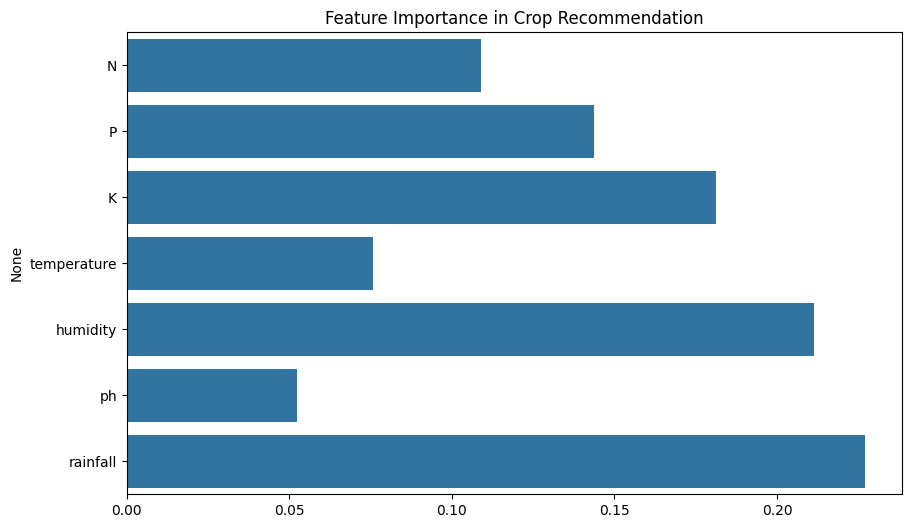

In [6]:
# 10. Feature Importance Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Crop Recommendation")
plt.show()

In [21]:
# 11. Make a Prediction for New Input (Fixed Warning)
# Example input: [Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall]
input_data = np.array([[1, 4, 21, 225, 00, 7, 200]])

# Convert to DataFrame with the correct column names
input_df = pd.DataFrame(input_data, columns=X.columns)

# Predict using the model
predicted_label = model.predict(input_df)
predicted_crop = le.inverse_transform(predicted_label)
print(f"\nThe recommended crop is: {predicted_crop[0]}")



The recommended crop is: kidneybeans
